In [ ]:
from google.colab import drive
import pandas as pd



In [ ]:
# import data
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/default+of+credit+card+clients.zip" -d "/content/drive/MyDrive/Credit_data/"

Mounted at /content/drive
Archive:  /content/drive/MyDrive/default+of+credit+card+clients.zip
replace /content/drive/MyDrive/Credit_data/default+of+credit+card+clients/default of credit card clients.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# read data
credit_data = pd.read_excel('/content/drive/MyDrive/Credit_data/default+of+credit+card+clients/default of credit card clients.xls')

In [ ]:
# display the first few rows of the data
print(credit_data.head())

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

In [ ]:
# summary statistics of the data
print(credit_data.describe())

       Unnamed: 0     X1     X2     X3     X4     X5     X6     X7     X8  \
count       30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique      30001     82      3      8      5     57     12     12     12   
top            ID  50000      2      2      2     29      0      0      0   
freq            1   3365  18112  14030  15964   1605  14737  15730  15764   

           X9  ...    X15    X16    X17    X18    X19    X20    X21    X22  \
count   30001  ...  30001  30001  30001  30001  30001  30001  30001  30001   
unique     12  ...  21549  21011  20605   7944   7900   7519   6938   6898   
top         0  ...      0      0      0      0      0      0      0      0   
freq    16455  ...   3195   3506   4020   5249   5396   5968   6408   6703   

          X23      Y  
count   30001  30001  
unique   6940      3  
top         0      0  
freq     7173  23364  

[4 rows x 25 columns]


In [ ]:
# check for missing values
print(credit_data.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


In [ ]:
# Set the first row as the column names
credit_data.columns = credit_data.iloc[0]
credit_data = credit_data[1:]

# Reset the index
credit_data.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
print(credit_data.head())

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
0  1     20000   2         2        1  24     2     2    -1    -1  ...   
1  2    120000   2         2        2  26    -1     2     0     0  ...   
2  3     90000   2         2        2  34     0     0     0     0  ...   
3  4     50000   2         2        1  37     0     0     0     0  ...   
4  5     50000   1         2        1  57    -1     0    -1     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
0         0         0         0        0      689        0        0        0   
1      3272      3455      3261        0     1000     1000     1000        0   
2     14331     14948     15549     1518     1500     1000     1000     1000   
3     28314     28959     29547     2000     2019     1200     1100     1069   
4     20940     19146     19131     2000    36681    10000     9000      689   

0 PAY_AMT6 default payment next month  
0        0                        

In [ ]:
data = credit_data[['AGE', 'default payment next month']]

In [ ]:
# Descriptive statistics for age based on default status
defaulted = data[data['default payment next month'] == 1]
not_defaulted = data[data['default payment next month'] == 0]

print("Defaulted Customers' Age Statistics")
print(defaulted['AGE'].describe())

print("\nNon-Defaulted Customers' Age Statistics")
print(not_defaulted['AGE'].describe())


Defaulted Customers' Age Statistics
count     6636
unique      53
top         27
freq       313
Name: AGE, dtype: int64

Non-Defaulted Customers' Age Statistics
count     23364
unique       56
top          29
freq       1292
Name: AGE, dtype: int64


In [ ]:

# Calculate the frequency of each class
class_counts = credit_data['default payment next month'].value_counts()

# Display the frequency of each class
print(class_counts)


default payment next month
0    23364
1     6636
Name: count, dtype: int64


# **Exploratory** **Data** **Analysis**

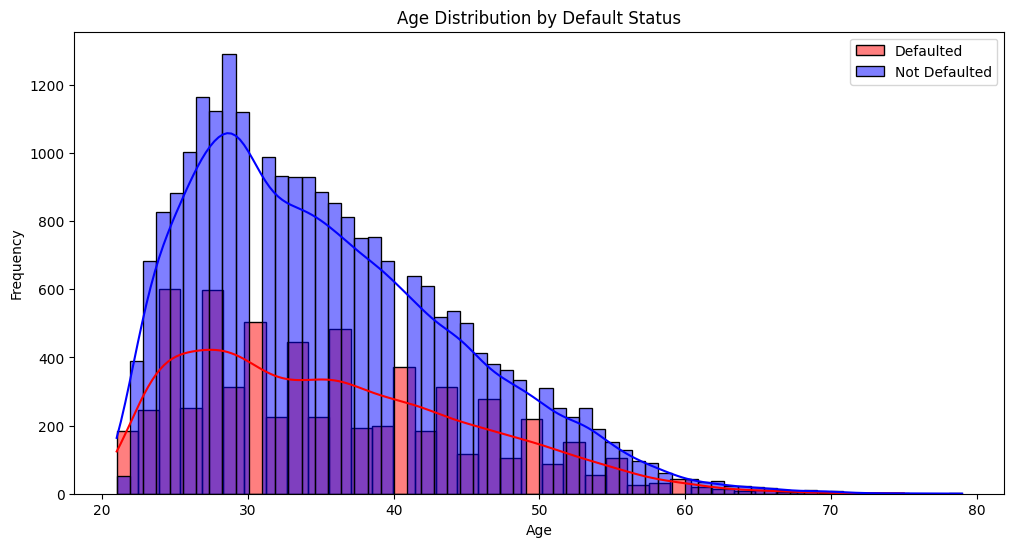

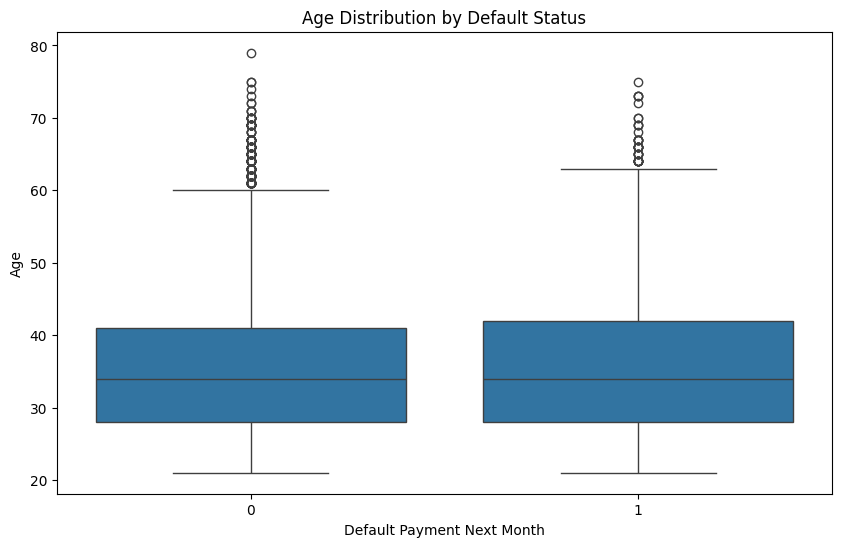

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age for defaulted and non-defaulted customers
plt.figure(figsize=(12, 6))
sns.histplot(defaulted['AGE'], kde=True, color='red', label='Defaulted')
sns.histplot(not_defaulted['AGE'], kde=True, color='blue', label='Not Defaulted')
plt.legend()
plt.title('Age Distribution by Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='AGE', data=data)
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.show()


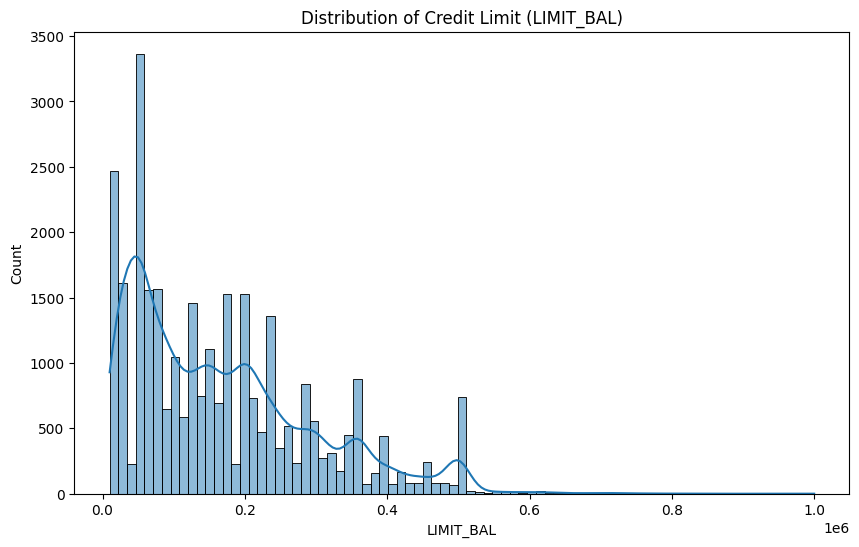

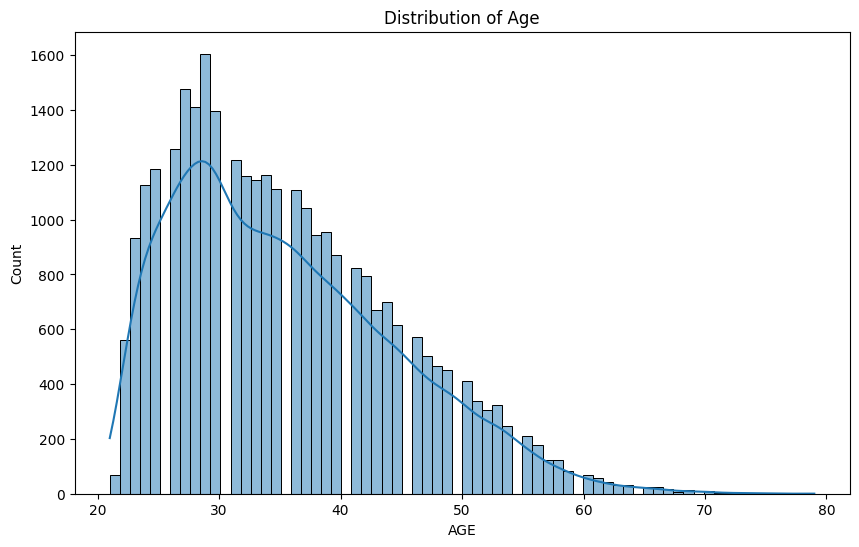

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['LIMIT_BAL'], kde=True)
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.show()

# Histogram for AGE
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()


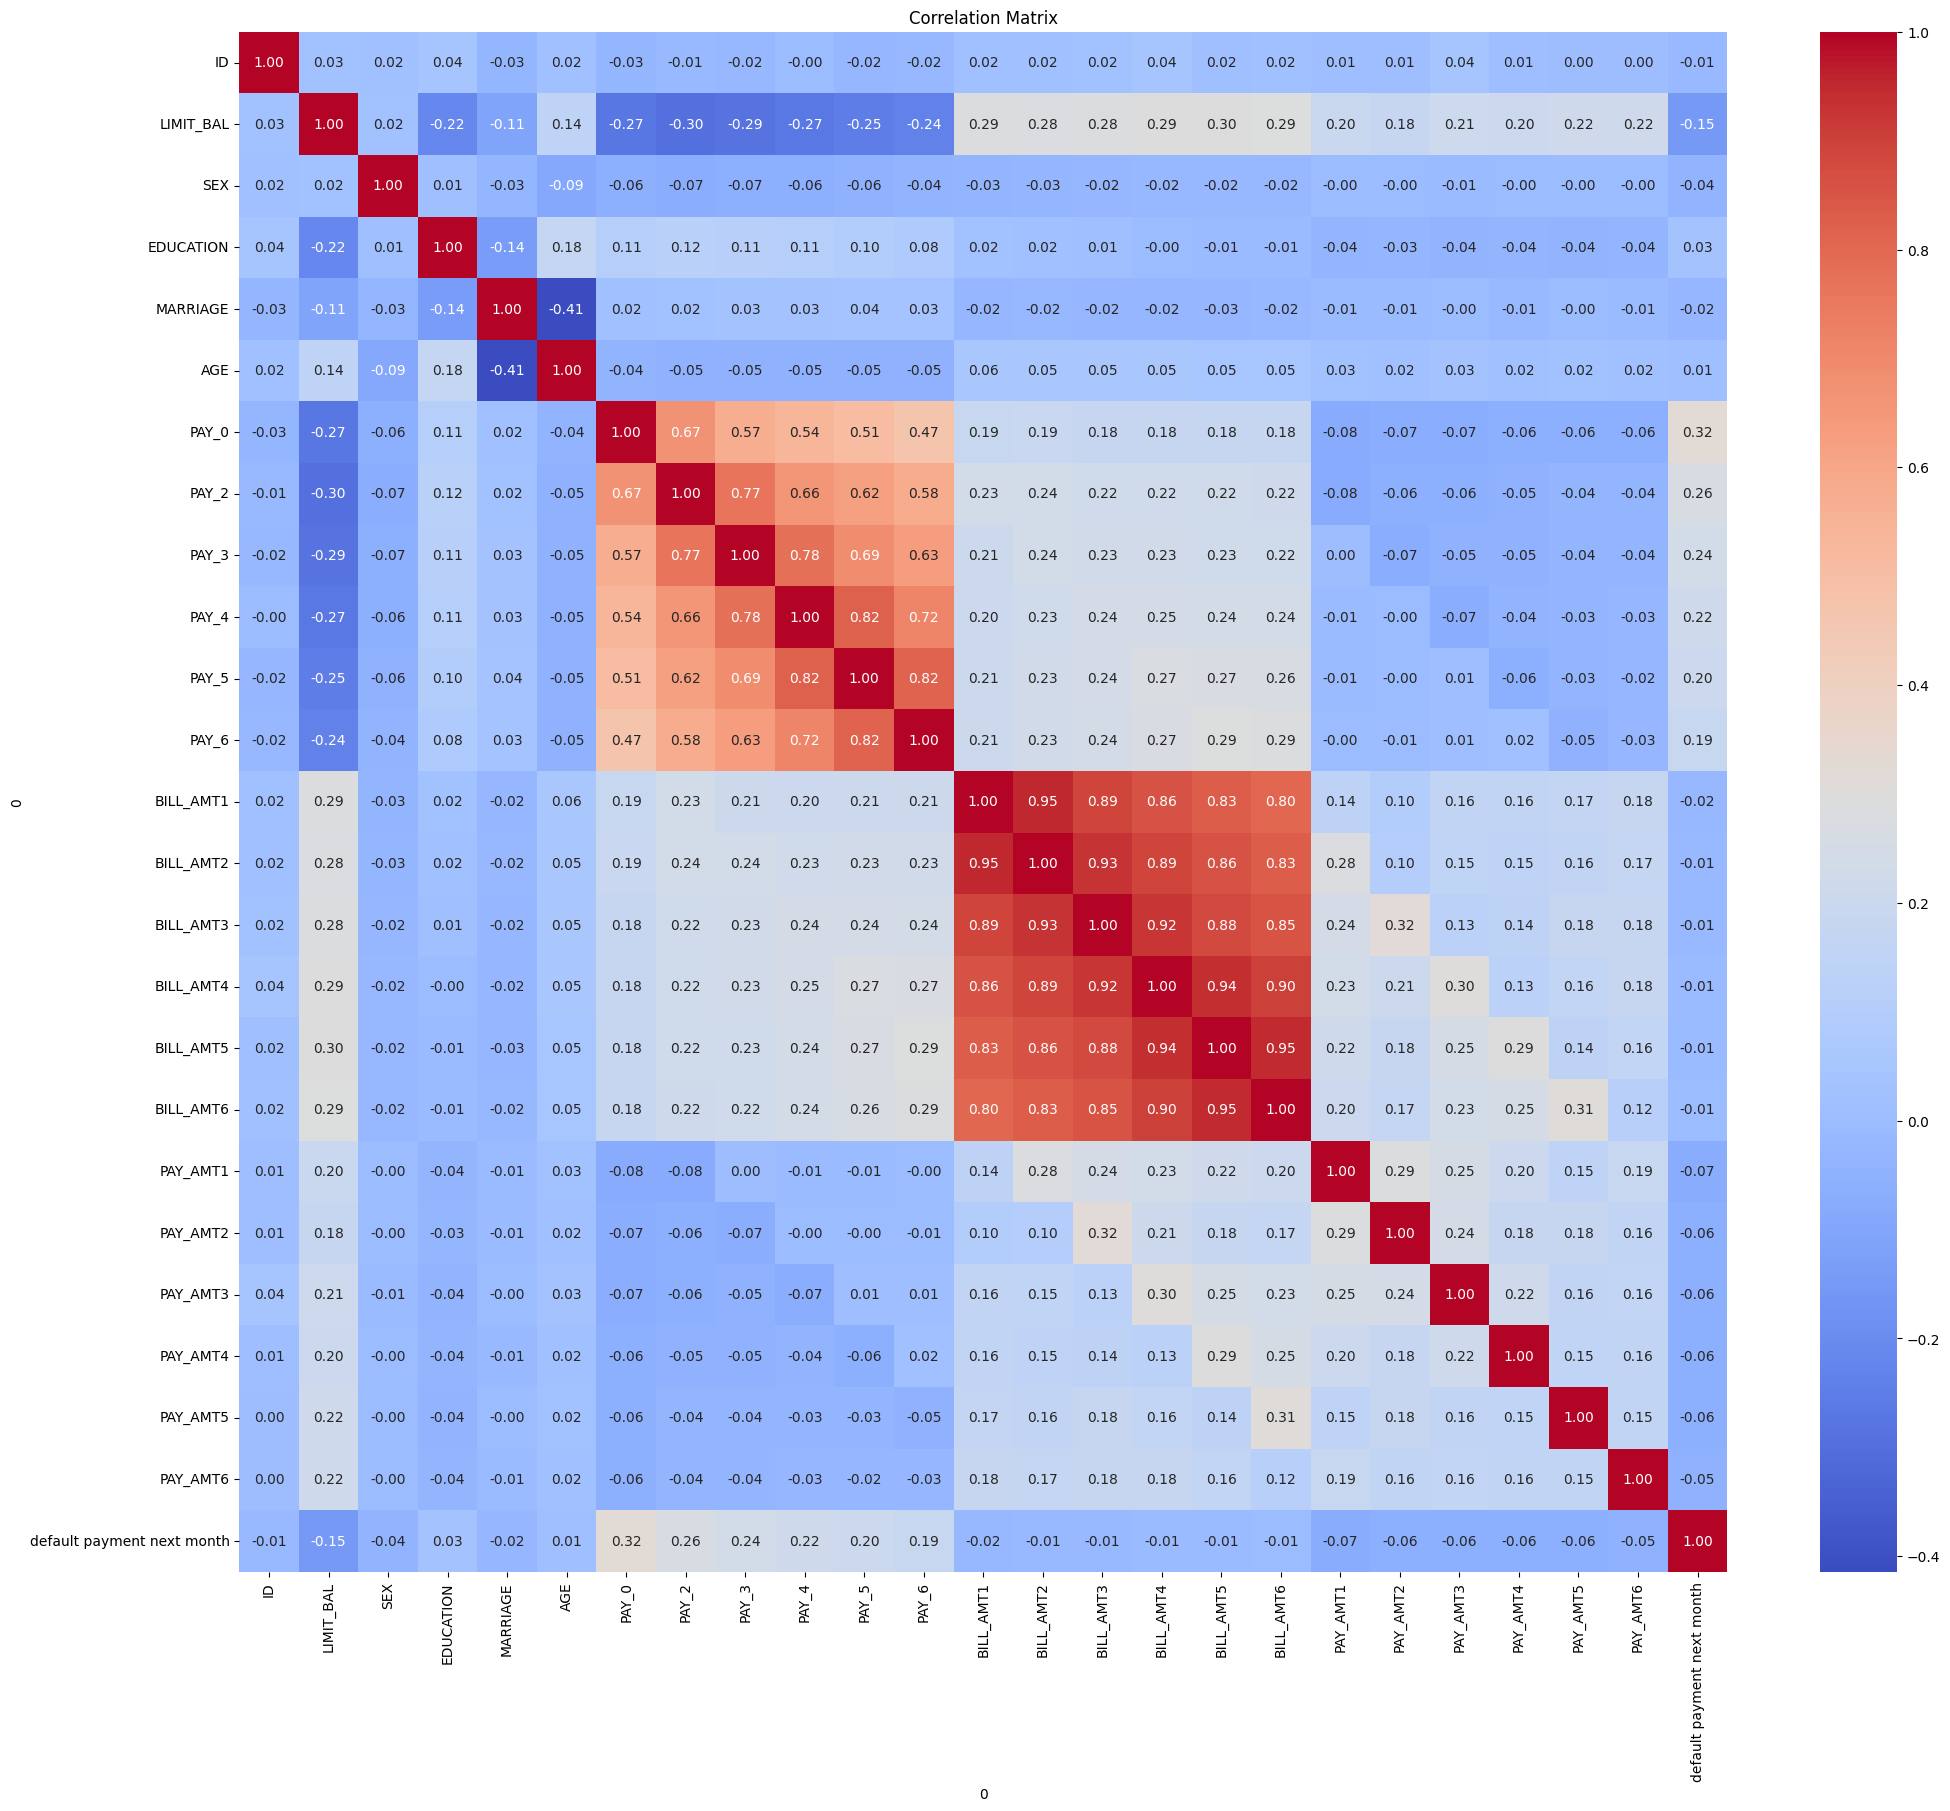

In [ ]:
plt.figure(figsize=(24, 20))
correlation_matrix = credit_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


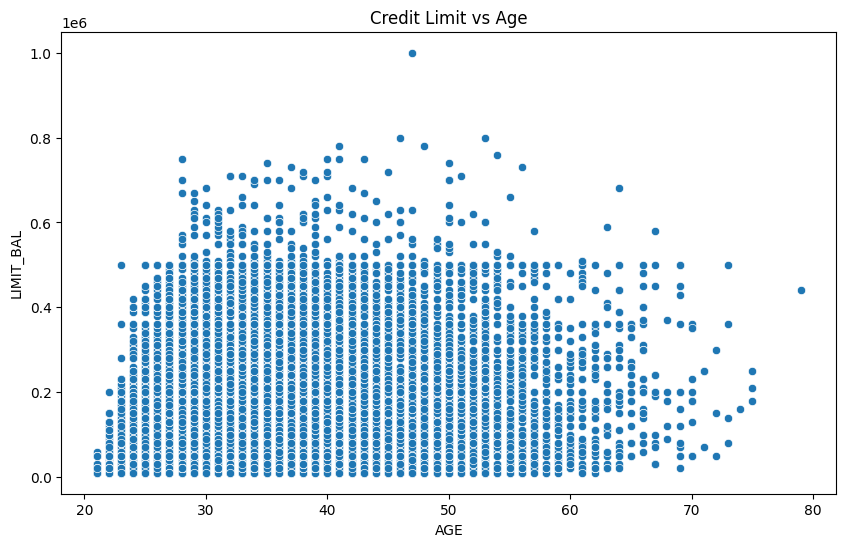

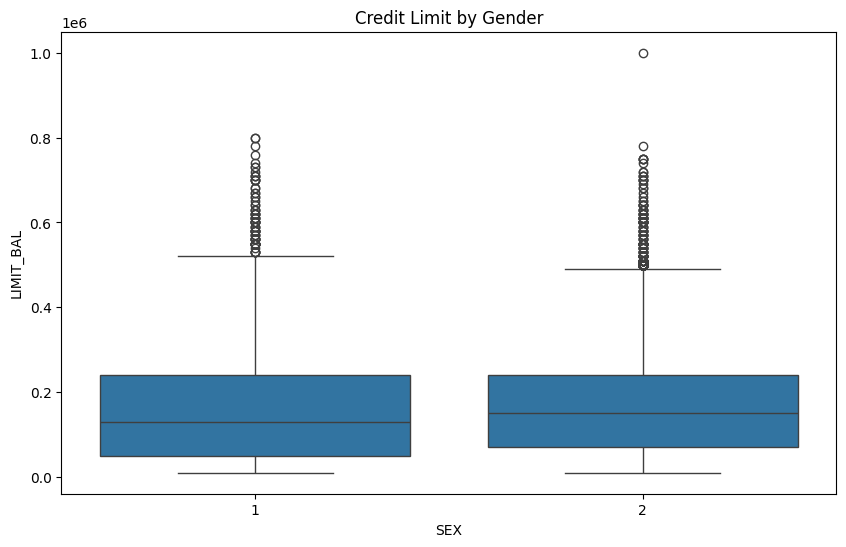

In [ ]:
# Scatter plot for LIMIT_BAL vs AGE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='LIMIT_BAL', data=credit_data)
plt.title('Credit Limit vs Age')
plt.show()

# Box plot for LIMIT_BAL by SEX
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=credit_data)
plt.title('Credit Limit by Gender')
plt.show()


In [ ]:
# Summary statistics for payment history columns
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
print(credit_data[pay_columns].describe())


0       PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
count   30000  30000  30000  30000  30000  30000
unique     11     11     11     11     10     10
top         0      0      0      0      0      0
freq    14737  15730  15764  16455  16947  16286


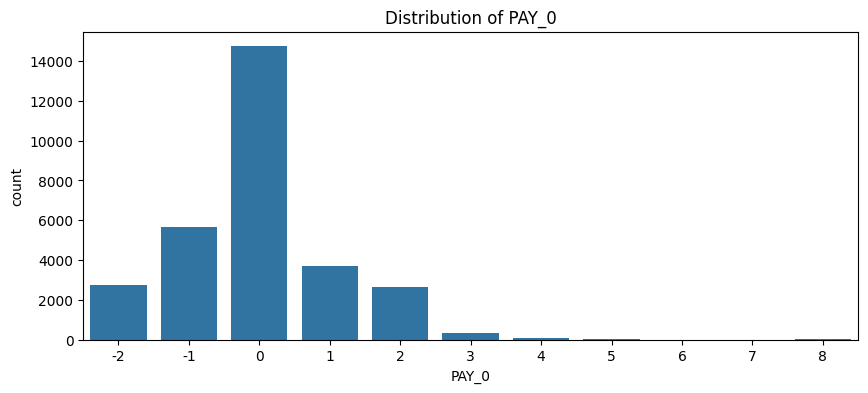

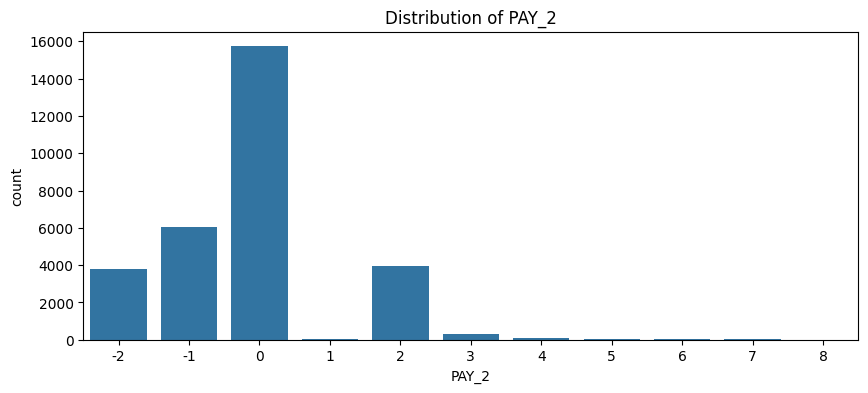

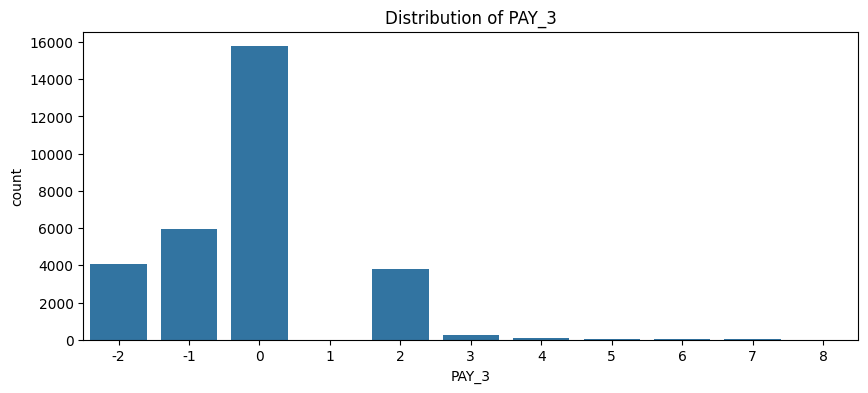

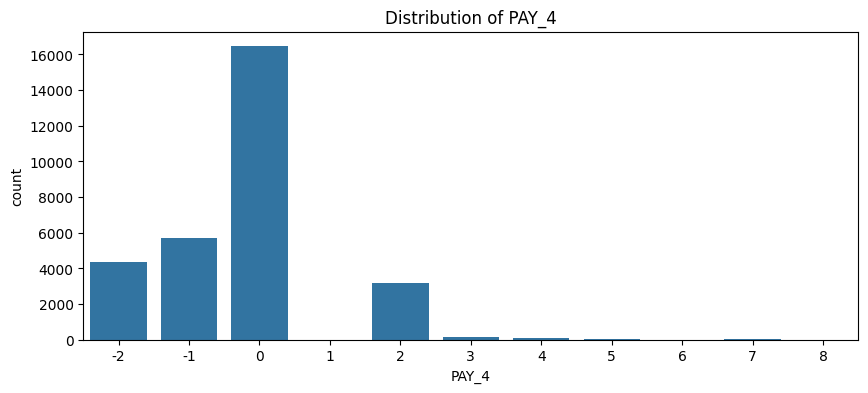

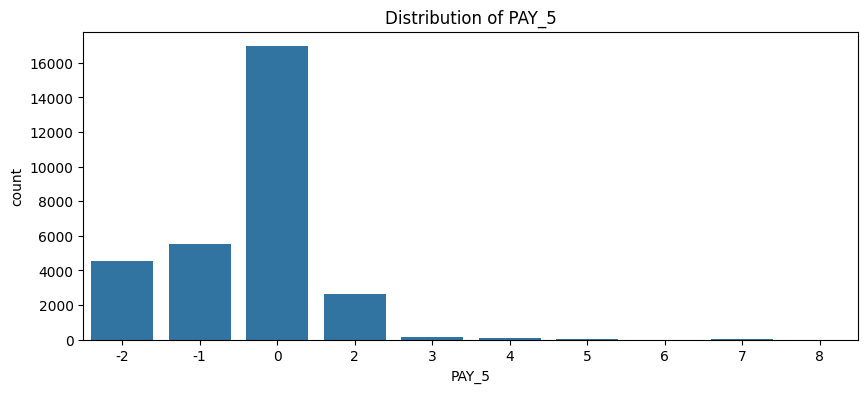

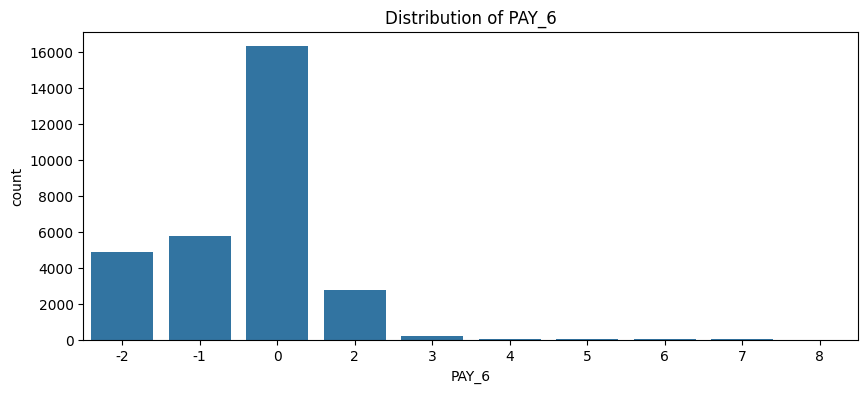

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of payment history columns
for col in pay_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=credit_data)
    plt.title(f'Distribution of {col}')
    plt.show()


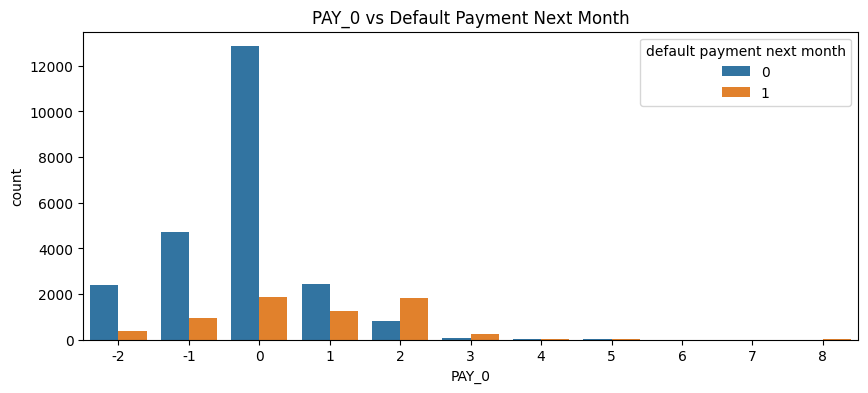

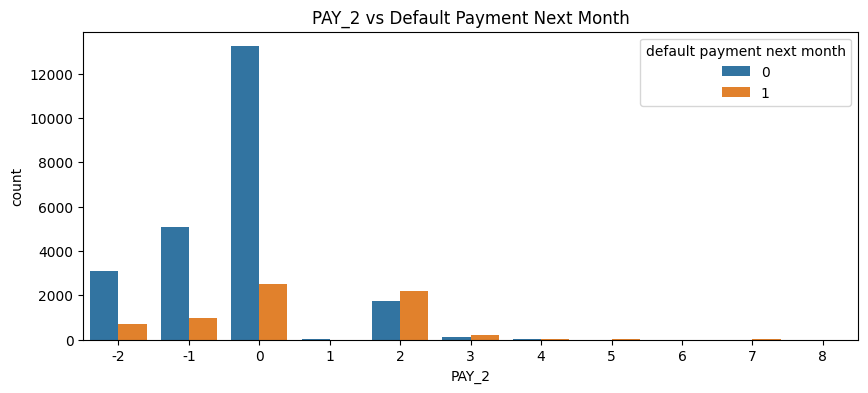

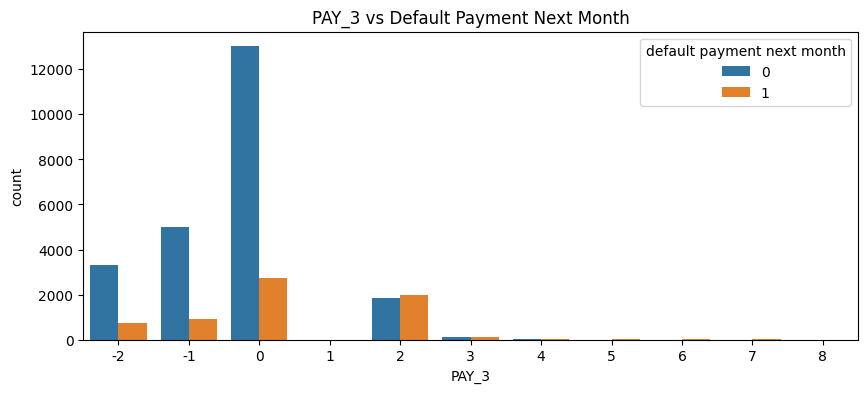

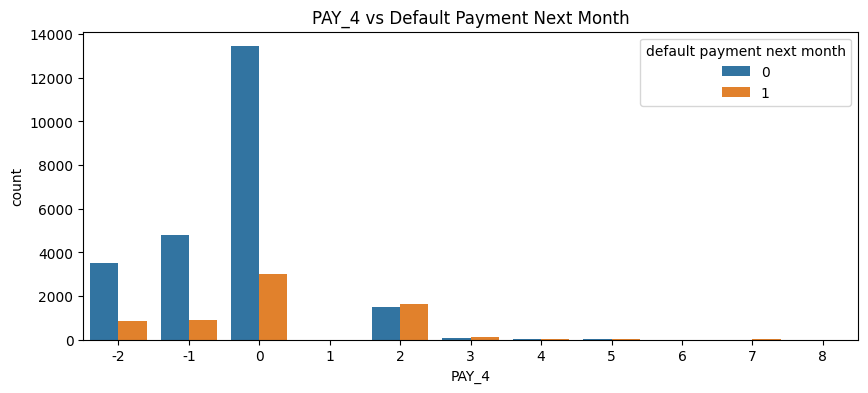

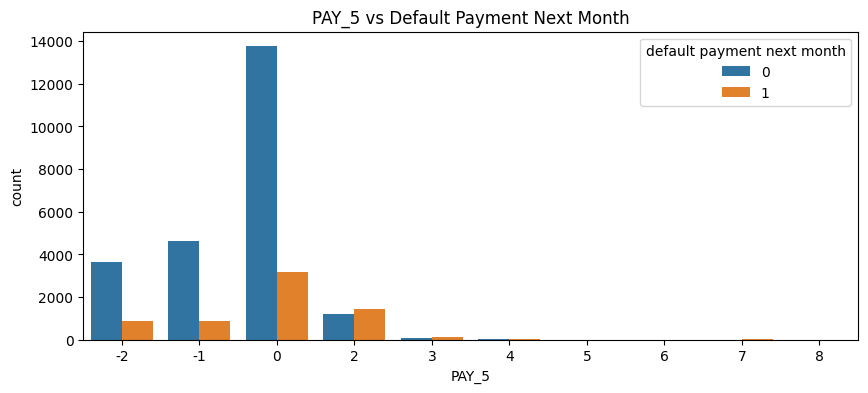

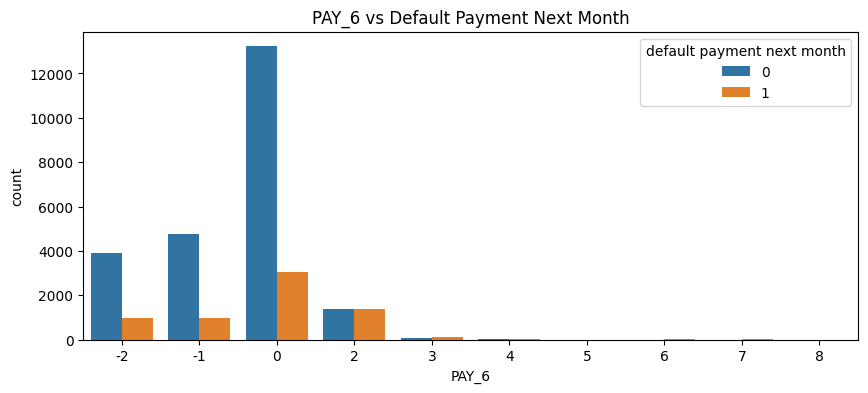

In [ ]:
# Analyzing the relationship between payment history and default
for col in pay_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='default payment next month', data=credit_data)
    plt.title(f'{col} vs Default Payment Next Month')
    plt.show()


# **Data** **Preprocessing**

In [37]:
from sklearn.preprocessing import StandardScaler


# Feature Scaling
# Extract features and target variable
X = credit_data.drop(columns=['default payment next month'])
y = credit_data['default payment next month']

# Ensure the target variable is numeric
y = y.astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

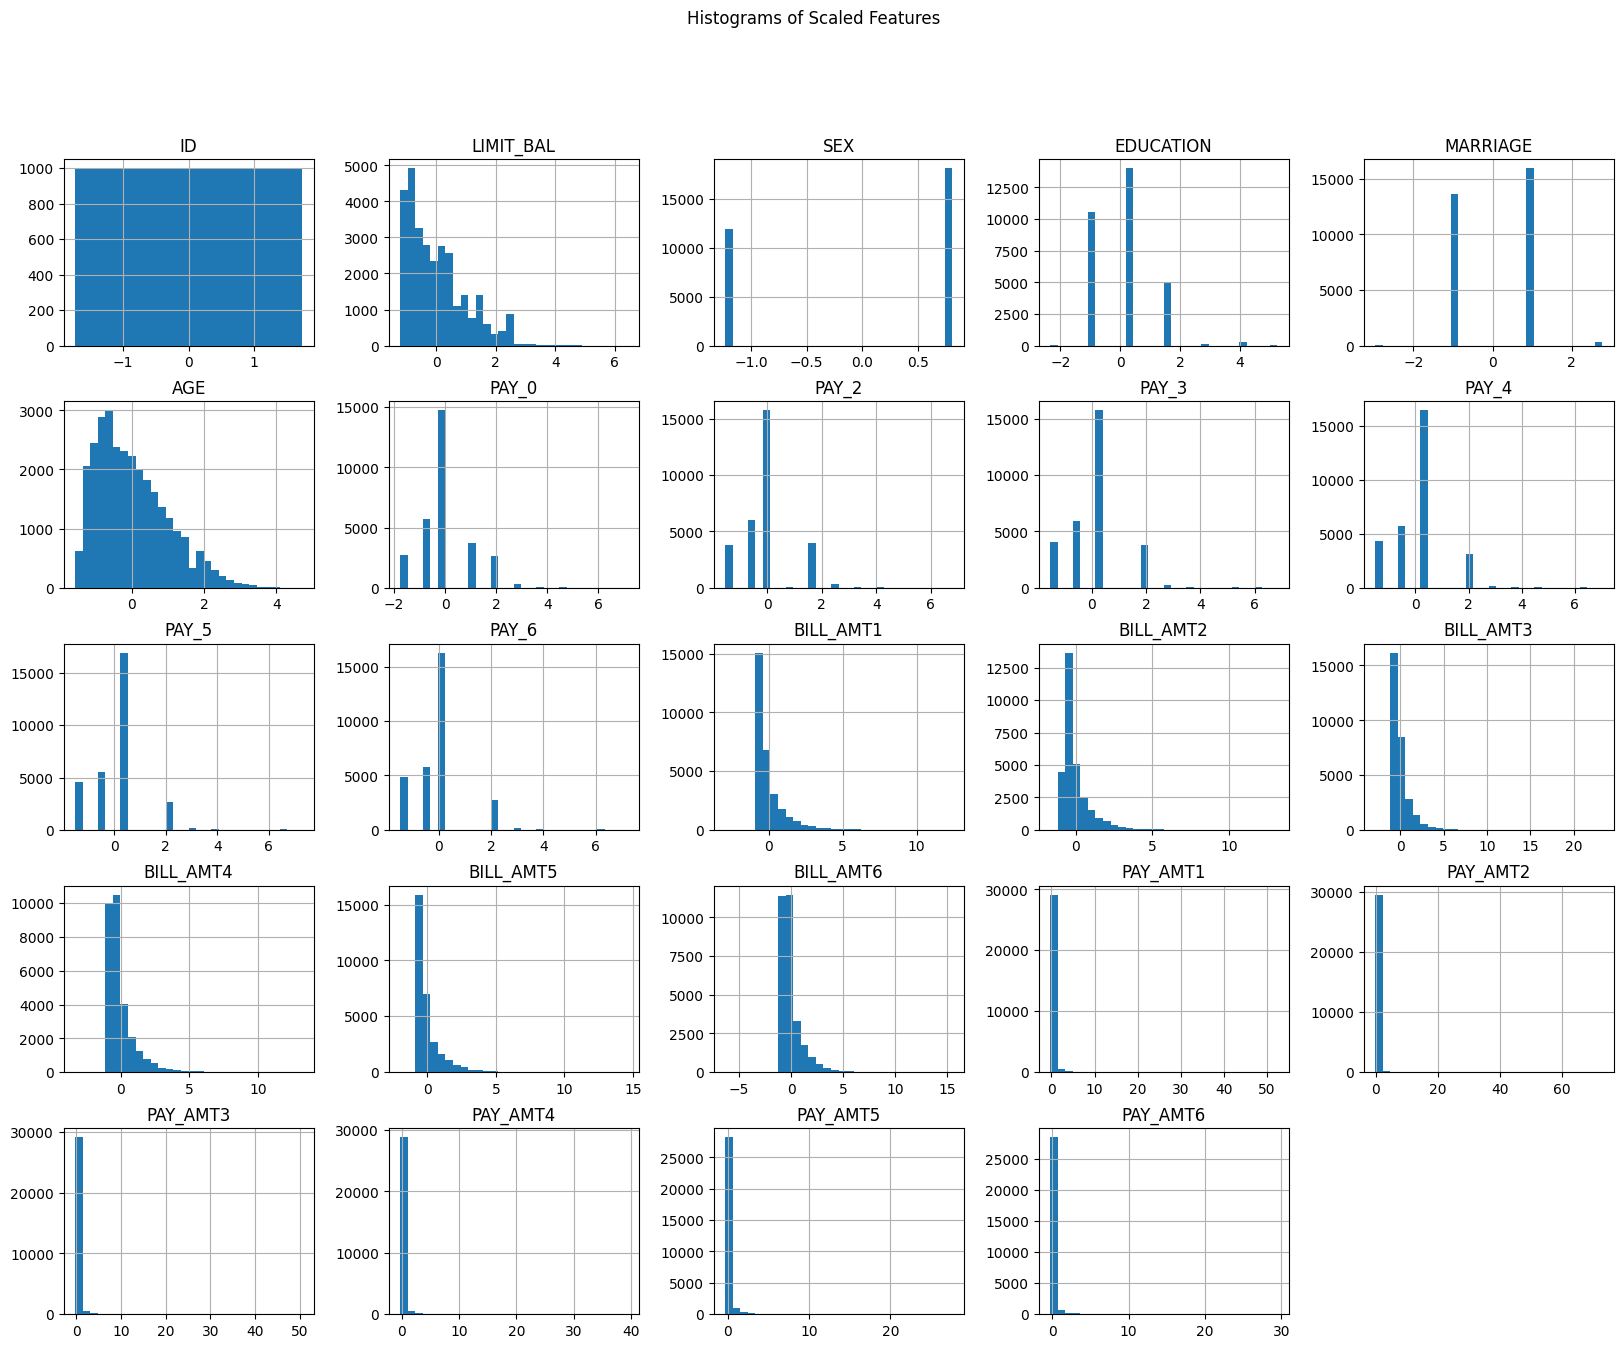

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the scaled data back to a DataFrame for easier inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot histograms of the scaled features
X_scaled_df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Scaled Features")
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE

#Addressing Class Imbalance
# Check class distribution
print(y.value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)


default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [43]:
# Check the class distribution of y_res after SMOTE
print(pd.Series(y_res).value_counts())

default payment next month
1    23364
0    23364
Name: count, dtype: int64
